In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
customers = pd.read_csv('Mall_Customers.csv')

In [3]:
customers.drop('CustomerID',axis=1,inplace=True)

In [4]:
customers.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [6]:
customers.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


<AxesSubplot:xlabel='Gender', ylabel='count'>

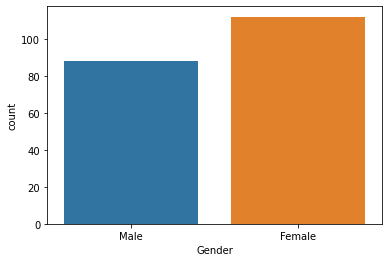

In [7]:
sns.countplot(x='Gender',data=customers)

In [8]:
gender_count = customers.groupby('Gender')['Age'].count()

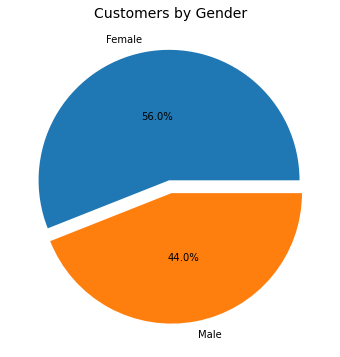

In [9]:
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x=gender_count, autopct="%.1f%%", explode=[0.05]*2, labels=gender_count.keys(), pctdistance=0.5)
plt.title("Customers by Gender", fontsize=14);

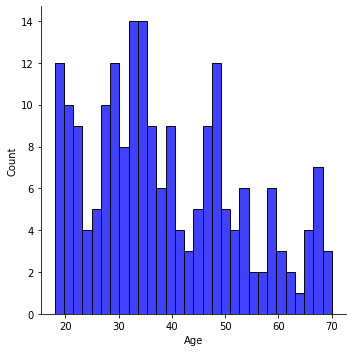

In [10]:
sns.displot(customers['Age'],bins=30,kde=False,color='blue')

<AxesSubplot:ylabel='Age'>

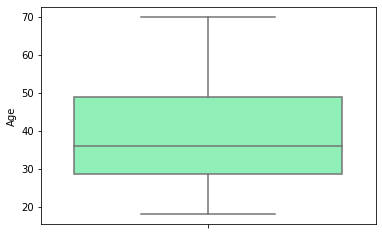

In [11]:
sns.boxplot(y='Age',data=customers,palette='rainbow')

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Count'>

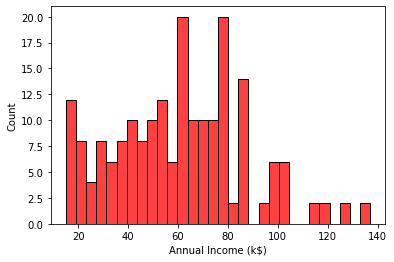

In [12]:
sns.histplot(customers['Annual Income (k$)'],bins=30,kde=False,color='red')

D:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

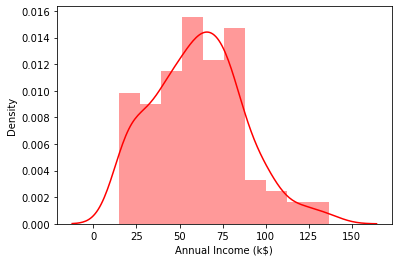

In [13]:
sns.distplot(customers['Annual Income (k$)'],color='red')

<AxesSubplot:xlabel='Spending Score (1-100)'>

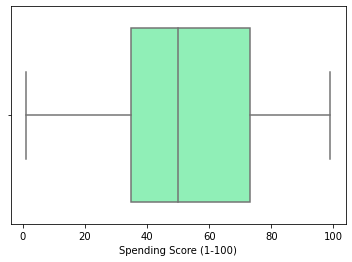

In [14]:
sns.boxplot(x='Spending Score (1-100)',data=customers,palette='rainbow')

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Count'>

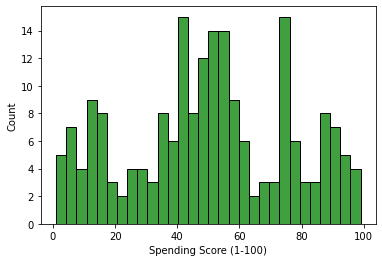

In [15]:
sns.histplot(customers['Spending Score (1-100)'],bins=30,kde=False,color='green')

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customers.drop('Gender',axis=1))

In [18]:
from sklearn.cluster import KMeans

In [19]:
kmeans = KMeans(n_clusters=2)

In [20]:
kmeans.fit(scaled_features)

KMeans(n_clusters=2)

In [21]:
kmeans.cluster_centers_

array([[-0.75277339,  0.00262858,  0.74265245],
       [ 0.70892251, -0.00247545, -0.69939115]])

In [22]:
kmeans_kwargs = {
     "init": "random",
     "n_init": 10,
     "max_iter": 300
 }


sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

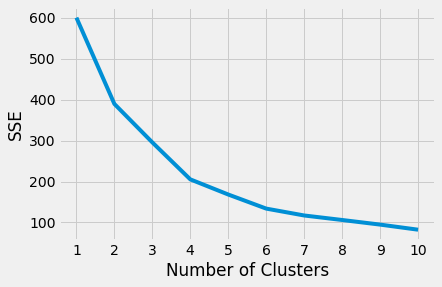

In [23]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [24]:
from kneed import KneeLocator

In [25]:
kl = KneeLocator(
     range(1, 11), sse, curve="convex", direction="decreasing"
)

In [26]:
kl.elbow

4

In [27]:
from sklearn.metrics import silhouette_score

In [28]:
silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

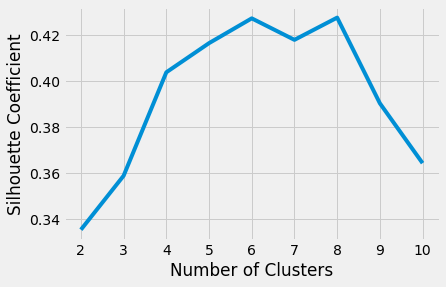

In [29]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [30]:
customers.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [31]:
customers_values = customers[['Age','Annual Income (k$)','Spending Score (1-100)']]

In [32]:
def doKmeans(X, nclust):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(customers_values, 5)
kmeans = pd.DataFrame(clust_labels)
customers_values.insert((customers_values.shape[1]),'kmeans',kmeans)

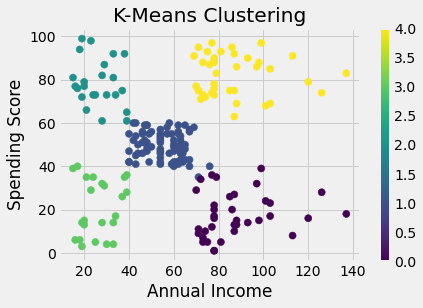

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(customers_values['Annual Income (k$)'],customers_values['Spending Score (1-100)'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Annual Income')
ax.set_ylabel('Spending Score')
plt.colorbar(scatter)